   # Dating App Popularity
Dating apps have always intrigued me. Without them, we're relying on some level of serendipity to connect with others romantically.

Pre-dating apps, my social circle met through friends or in college. Heck, when I was out for dinner recently, I overheard a conversation of daughters asking their mom how she met their dad. The mom replied, “We met through church friends and your god mother introduced us thinking your dad and I would hit it off. She hosted a dinner, invited the both of us, and we started dating after that.”

How cute!

As of Fall 2021, I read three consecutive "How We Met" stories on Zola and The Knot of former coworkers and acquaintances that described meeting their match on Bumble and Tinder.

Is this a mere coincidence or will it be an ongoing trend?

What do you foresee Heimdall?

![](IMG_3114.jpg)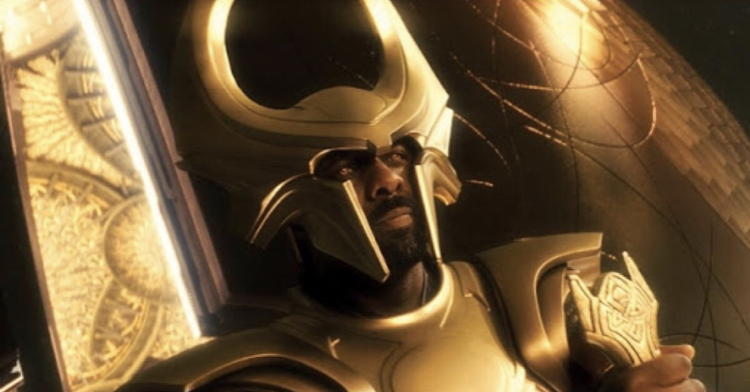

In speaking to Heimdall, he references a Feb 2020 article from Pew Research. Pew surveyed US Adults and found that 12% have been married or in a committed relationship with someone they met through online dating.

   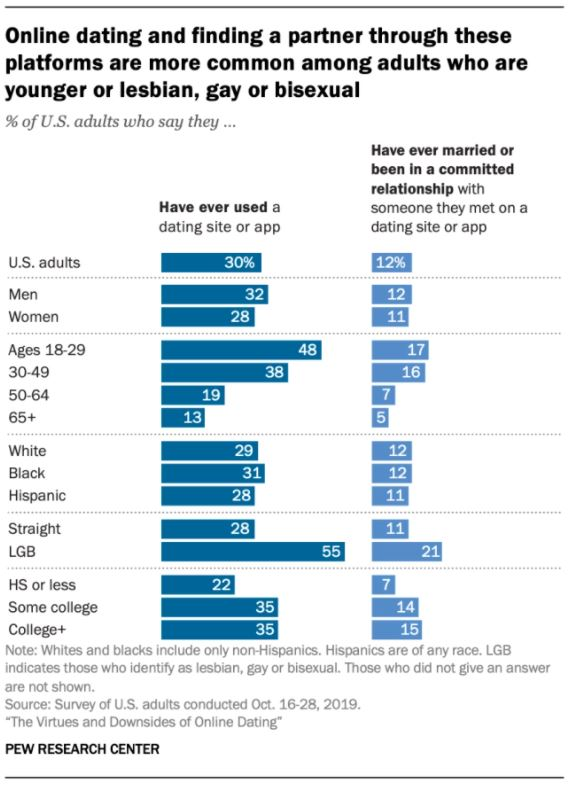
    
If we dive deeper by age segmentation, the same proportion (16-17%) of US Adults in both age groups 18-29 and 30-49 have been in a committed relationship or married to someone they met on a dating site or app. According to this survey, there is a 58% decrease among Americans over 50 who use online dating.

As to whether dating apps are becoming more popular over time, Pew writes that "The share of Americans who have used these platforms – as well as the share who have found a spouse or partner through them – has risen over time,” from 3% of Americans in 2013 to 12% in 2019. (Note: There were some changes in question wording between Pew’s 2013 and 2019 surveys, as well as differences in how these surveys were fielded.)

The growth in self-reported online dating may even underestimate its true impact, because there is likely a lag between online dating use today and the number of committed relationships and marriages via online dating in the years to come.

In addition to surveys, let's examine other data sources to understand each app's popularity and trends over time.

Which leads me to the central question of this blog post:

# Which dating app is the most popular?

My hypothesis is Tinder is the most popular dating app.

Tinder invented the swipe gesture, a cultural phenomenon of 'swipe left' and 'swipe right' to accept or reject a match, which has since been adopted in other mobile products. Also, anecdotally, among my friends and family, Tinder is the most well-known.

My ideal metric to measure popularity would be the number of matches (serious relationships) that each app generates. Since this cannot be measured directly, this analysis will rely on survey data, Google Trends, Statista and SEC data sources as proxies.

For this analysis, I will examine the following 5 apps:

1. Tinder
2. Bumble
3. Hinge
4. OkCupid
5. Match

We can first look at US search interest data from Google Trends using the Pytrends API. I hypothesize dating app search trends are correlated to user app downloads and actual app engagement time. After all, a user would perform a Google search when they have a question related to the app, technical or informational. The strength of the correlation between google trends, app download, and app revenue is currently unknown, so we might as well explore it in this analysis now that our relationship is this deep in ;).

# 1a. Pull data from Pytrends API

In [1]:
# import the TrendReq method from the pytrends request module
from pytrends.request import TrendReq

# execute the TrendReq method by passing the host language (hl) and timezone (tz) parameters
pytrends = TrendReq(hl='en-US', tz=360)

In [2]:
#This step is done to ensure you are searching for the right keyword to track from the Pytrends API

#Max search at the same time on googletrends is 5.

# Get Google Keyword Suggestions
pytrends.suggestions(keyword='Tinder')
#'/m/0wfqsst'

[{'mid': '/m/0wfqsst', 'title': 'Tinder', 'type': 'App'},
 {'mid': '/m/02fkt0', 'title': 'Tinder', 'type': 'Topic'},
 {'mid': '/m/010nwtcd', 'title': 'Tinder', 'type': 'Company'},
 {'mid': '/m/02wvtv', 'title': 'Tinderbox', 'type': 'Topic'},
 {'mid': '/m/028b6nt', 'title': 'Hoof fungus', 'type': 'Fungus'}]

In [3]:
# Get Google Keyword Suggestions
pytrends.suggestions(keyword='Bumble')
#'/g/11g6j35tbl'

[{'mid': '/g/11g6j35tbl', 'title': 'Bumble', 'type': 'Topic'},
 {'mid': '/m/01b_xd', 'title': 'Bumblebee', 'type': 'Insects'},
 {'mid': '/g/11dymbqf4b', 'title': 'Bumblebee', 'type': 'Film'},
 {'mid': '/m/0ftwtv', 'title': 'Bumblefoot', 'type': 'Infection'},
 {'mid': '/m/08h2ks', 'title': 'David Lloyd', 'type': 'Cricketer'}]

In [4]:
# Get Google Keyword Suggestions
pytrends.suggestions(keyword='Hinge')
#'/g/11hd1s2dbb'

[{'mid': '/g/11hd1s2dbb', 'title': 'Hinge', 'type': 'App'},
 {'mid': '/g/122919_0', 'title': 'Hinge', 'type': 'Topic'},
 {'mid': '/m/01lsn3', 'title': 'Hinge', 'type': 'Topic'},
 {'mid': '/m/09s503', 'title': 'Hinge joint', 'type': 'Topic'},
 {'mid': '/m/02z3jkj', 'title': 'Hinges', 'type': 'Commune in France'}]

In [5]:
# Get Google Keyword Suggestions
pytrends.suggestions(keyword='OkCupid')
#'/m/05rbwm'

[{'mid': '/m/05rbwm', 'title': 'OkCupid', 'type': 'Website'},
 {'mid': '/m/03xhqk9', 'title': 'Humor Rainbow', 'type': 'Company'},
 {'mid': '/g/11bwfvpkdb',
  'title': 'No Baggage: A Minimalist Tale of Love and Wandering',
  'type': 'Topic'}]

In [6]:
# Get Google Keyword Suggestions
pytrends.suggestions(keyword='Match.com')
#'/m/07zj3b'

[{'mid': '/m/07zj3b', 'title': 'Match.com', 'type': 'Topic'},
 {'mid': '/g/11qmc27_hx',
  'title': 'Nineteen Eighty-Four: The Graphic Novel',
  'type': 'Topic'},
 {'mid': '/m/0hmyfsv', 'title': 'Meta', 'type': 'Technology company'},
 {'mid': '/g/11h1f1njsy',
  'title': 'The Duck and the Kangaroo',
  'type': 'Topic'}]

# 1b. Query Parameters
    The query parameters: each of the apps, US data, 2014 to present day. 
    (2014 was the year all apps above were available for usage)

In [7]:
# build list of keywords
kw_list = {'/m/0wfqsst','/g/11g6j35tbl','/g/11hd1s2dbb','/m/05rbwm',
           '/m/07zj3b'}

# build the payload
df=pytrends.build_payload(kw_list, timeframe='2014-12-01 2021-12-27', geo='US')

In [8]:
#import pandas module
import pandas as pd

#store interest over time information in df
df = pytrends.interest_over_time().drop(columns='isPartial')

df = df.rename(columns={'/m/0wfqsst': 'Tinder', '/g/11g6j35tbl': 'Bumble', '/g/11hd1s2dbb': 'Hinge',
                       '/m/05rbwm': 'OkCupid','/m/07zj3b': 'Match.com'})
print(df.tail(5))

            Bumble  OkCupid  Match.com  Tinder  Hinge
date                                                 
2021-08-01      28        8         29      81     15
2021-09-01      28        9         27      80     14
2021-10-01      22       12         37      85     16
2021-11-01      19       12         37      85     17
2021-12-01      20       11         34      82     16


# 1c. Data type inspection

    Let's make sure all the app data are integers to ensure we can analyze and visualize the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2014-12-01 to 2021-12-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Bumble     85 non-null     int32
 1   OkCupid    85 non-null     int32
 2   Match.com  85 non-null     int32
 3   Tinder     85 non-null     int32
 4   Hinge      85 non-null     int32
dtypes: int32(5)
memory usage: 2.3 KB


# 1d. Time to visualize
    Our data is ready to plot. 
    
    Let's also use a rolling average of 12 months to smooth fluctuations.

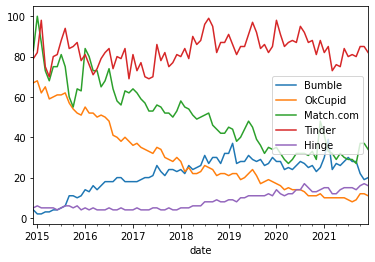

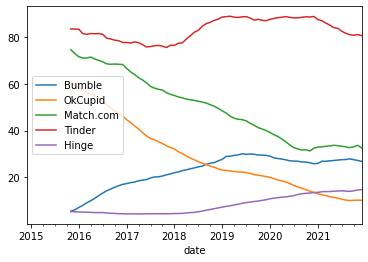

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()

df.rolling(window=12).mean().plot()
plt.show()

# 1. Time series analysis

Our data series begins when the last app Bumble launched in December 2014. It appears Tinder has always held a consistent lead in Google search popularity for the entire 2014-2021 period. Match.com and OkCupid have steadily declined since 2014 as Bumble and Hinge became more popular. The spike in Bumble search in 2021 is most likely due to the IPO on February 10th, 2021.

# 2. Search interest by region

    Let's dive deeper and also look at search interest by region relative to each other.

In [11]:
# build list of keywords
kw_list = {'/m/0wfqsst','/g/11g6j35tbl','/g/11hd1s2dbb','/m/05rbwm',
           '/m/07zj3b'}

# build the payload
df=pytrends.build_payload(kw_list, timeframe='2014-12-01 2021-12-27', geo='US')

#store interest by region information in df
search_by_region = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)
search_by_region = search_by_region.rename(columns={'/m/0wfqsst': 'Tinder', '/g/11g6j35tbl': 'Bumble', '/g/11hd1s2dbb': 'Hinge',
                       '/m/05rbwm': 'OkCupid','/m/07zj3b': 'Match.com'})

#Top 5 states Tinder is more relative to other 4 apps
print(search_by_region.sort_values(by='Tinder', ascending=False).head().drop(columns=['OkCupid','Bumble','Hinge','Match.com']))

             Tinder
geoName            
Hawaii           54
Utah             54
Alaska           54
Arkansas         53
Mississippi      52


In [12]:
#Top 5 states Bumble is more popular, highest to lowest
print(search_by_region.sort_values(by='Bumble', ascending=False).head(5).drop(columns=['OkCupid','Tinder','Hinge','Match.com']))

                      Bumble
geoName                     
California                14
District of Columbia      14
Texas                     14
Colorado                  13
Maryland                  13


In [13]:
#Top 5 states Hinge is more popular, highest to lowest
print(search_by_region.sort_values(by='Hinge', ascending=False).head().drop(columns=['OkCupid','Bumble','Tinder','Match.com']))

                      Hinge
geoName                    
District of Columbia      6
New York                  6
New Jersey                5
California                5
Colorado                  5


In [14]:
#Top 5 states OkCupid is more popular, highest to lowest
print(search_by_region.sort_values(by='OkCupid', ascending=False).head().drop(columns=['Hinge','Bumble','Tinder','Match.com']))

                      OkCupid
geoName                      
Oregon                     20
District of Columbia       18
Massachusetts              17
Vermont                    17
Oklahoma                   17


In [15]:
#Top 5 states Match.com is more popular, highest to lowest
print(search_by_region.sort_values(by='Match.com', ascending=False).head().drop(columns=['Hinge','Bumble','Tinder','OkCupid']))

              Match.com
geoName                
North Dakota         36
South Dakota         36
Wisconsin            34
Iowa                 32
Delaware             32


I'm surprised at the search interest regional patterns of each dating app.

- I'm curious about the sensitivity of the regional rankings the more I tinker with the date range.
- Bumble and Hinge are relatively more popular in Texas and NY respectively; this could be due to the fact that the companies are headquartered in these states.
- OkCupid is most popular in Oregon+Washington and in Massachusetts+Washington DC.
- Match.com is quite popular in the midwestern states.

# 3. App Downloads and Revenue

The number of app downloads and gross revenue are two additional metrics of dating app popularity. It is reasonable to assume that app downloads are positively correlated with user engagement and the number of matches/relationships generated by each dating app. I obtained both Apple store and Google Play store data from Statista.com for Tinder and Bumble North and Latin America regions.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Statista = pd.read_csv('Statista.csv')

Statista

Year  Tinder App Downloads (in 1000s)  Tinder App Rev (in 1000s of $)  \
0  2018                            29074                          805316   
1  2019                            33063                         1152045   
2  2020                            34566                         1355400   

   Bumble App Downloads (in 1000s)  Bumble App Rev (in 1000s of $)  
0                             7683                          162391  
1                             9190                          275545  
2                            10434                          337237

In [17]:
Tinder_scatter=Statista[["Year","Tinder App Downloads (in 1000s)","Tinder App Rev (in 1000s of $)"]]

Tinder_scatter=Tinder_scatter.rename(columns={"Tinder App Downloads (in 1000s)": "App Downloads (in 1000s)",
                                              "Tinder App Rev (in 1000s of $)":"App Rev (in 1000s of $)"})
Tinder_scatter.loc[:,'Dating app'] = 'Tinder'
Tinder_scatter

Year  App Downloads (in 1000s)  App Rev (in 1000s of $) Dating app
0  2018                     29074                   805316     Tinder
1  2019                     33063                  1152045     Tinder
2  2020                     34566                  1355400     Tinder

In [18]:
Bumble_scatter=Statista[["Year","Bumble App Downloads (in 1000s)","Bumble App Rev (in 1000s of $)"]]

Bumble_scatter=Bumble_scatter.rename(columns={'Bumble App Downloads (in 1000s)': 'App Downloads (in 1000s)', 
                               "Bumble App Rev (in 1000s of $)": 'App Rev (in 1000s of $)'})
Bumble_scatter.loc[:,'Dating app'] = 'Bumble'
Bumble_scatter

Year  App Downloads (in 1000s)  App Rev (in 1000s of $) Dating app
0  2018                      7683                   162391     Bumble
1  2019                      9190                   275545     Bumble
2  2020                     10434                   337237     Bumble

In [19]:
scatter=Tinder_scatter.append(Bumble_scatter)
scatter

Year  App Downloads (in 1000s)  App Rev (in 1000s of $) Dating app
0  2018                     29074                   805316     Tinder
1  2019                     33063                  1152045     Tinder
2  2020                     34566                  1355400     Tinder
0  2018                      7683                   162391     Bumble
1  2019                      9190                   275545     Bumble
2  2020                     10434                   337237     Bumble

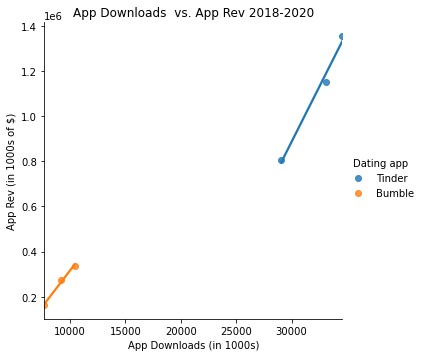

In [20]:
sns.lmplot(x="App Downloads (in 1000s)", y="App Rev (in 1000s of $)", hue="Dating app", data=scatter,ci=None)
plt.title("App Downloads  vs. App Rev 2018-2020")
plt.show()

# 4. Graph Theory and Revenue Growth - Does linear trend still hold?

['User1', 'User2', 'User3', 'User4', 'User5']
[('User1', 'User5'), ('User1', 'User3'), ('User1', 'User2'), ('User1', 'User4'), ('User2', 'User3'), ('User2', 'User5'), ('User2', 'User4'), ('User3', 'User4'), ('User3', 'User5'), ('User4', 'User5')]


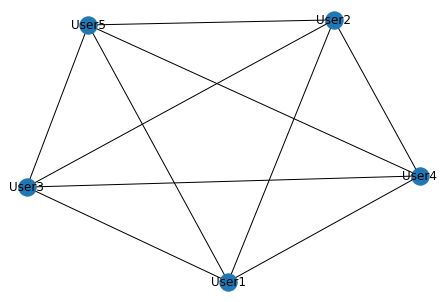

In [21]:
#Graph Theory
# Initiating an empty Graph object 
import networkx as nx
P = nx.Graph() # create an empty object
# You can add nodes using add_nodes_from()
P.add_nodes_from(['User1','User2','User3','User4','User5'])
# Use add_edges_from to add pairwise relationships
P.add_edges_from ([('User1','User5'), ('User1','User3'), ('User3','User2'), ('User2','User5'),('User1','User2'),
                   ('User3','User4'),('User5','User3'),('User4','User5'),('User1','User4'),('User4','User2')])

print(P.nodes())
print(P.edges())
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(P, with_labels = True)

Even though we observe a linear trend between app downloads and revenue, it is possible that revenues will scale non-linearly if users on larger apps can find exponentially-more matches. Graph analysis shows that as the number of users (nodes) increases, the number of potential connections between users (edges) increases at an accelerating rate. 2 users have 1 potential connection; 3 users have 2; 4 users have 6; and 5 users have 10.

# 5. Correlation between Google Trends, app downloads, and revenue

In [22]:
from pytrends.request import TrendReq

kw_list = {'/m/0wfqsst'}


Tinder_df=pytrends.build_payload(kw_list, timeframe= '2015-01-01 2020-12-01', geo='US')

#store interest over time information in df
Tinder_df = pytrends.interest_over_time().drop(columns='isPartial')

Tinder_df = Tinder_df.rename(columns={'/m/0wfqsst': 'Tinder Search Popularity'})
Tinder_df.tail()

Tinder Search Popularity
date                                
2020-08-01                        90
2020-09-01                        85
2020-10-01                        86
2020-11-01                        78
2020-12-01                        88

In [23]:
from pytrends.request import TrendReq

kw_list = {'/g/11g6j35tbl'}


Bumble_df=pytrends.build_payload(kw_list, timeframe= '2015-01-01 2020-12-01', geo='US')

#store interest over time information in df
Bumble_df = pytrends.interest_over_time().drop(columns='isPartial')

Bumble_df = Bumble_df.rename(columns={'/g/11g6j35tbl': 'Bumble Search Popularity'})
Bumble_df.tail()

Bumble Search Popularity
date                                
2020-08-01                        76
2020-09-01                        71
2020-10-01                        72
2020-11-01                        65
2020-12-01                        71

In [24]:
Pop=Tinder_df.merge(Bumble_df, how='inner', on='date').reset_index("date")
Pop=Pop[Pop["date"]>='2018-01-01']

import datetime

Pop['date'] = Pop['date'].dt.strftime('%m-%Y')
Pop.tail()

date  Tinder Search Popularity  Bumble Search Popularity
67  08-2020                        90                        76
68  09-2020                        85                        71
69  10-2020                        86                        72
70  11-2020                        78                        65
71  12-2020                        88                        71

In [25]:
DL=pd.read_csv('Statista_Tinder_Bumble_Monthly_Downloads.csv')

PopvDL=Pop.merge(DL, how='inner', on='date')
PopvDL.tail()

date  Tinder Search Popularity  Bumble Search Popularity  \
31  08-2020                        90                        76   
32  09-2020                        85                        71   
33  10-2020                        86                        72   
34  11-2020                        78                        65   
35  12-2020                        88                        71   

    Bumble Monthly Downloads (in 1000s)  Tinder Monthly Downloads (in 1000s)  
31                               913918                              3022419  
32                               818455                              2694957  
33                               921190                              2825089  
34                               893604                              2746907  
35                               966302                              2685450

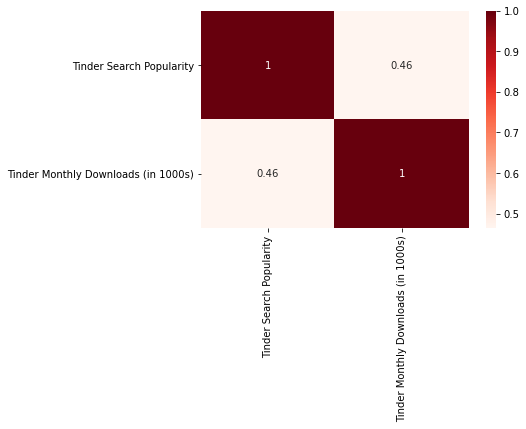

In [26]:
Tinder_corr=PopvDL.tail().drop(columns=['Bumble Search Popularity','Bumble Monthly Downloads (in 1000s)']).set_index('date')
Tinder_corr.corr()

Tinder = sns.heatmap(Tinder_corr.corr(), cmap='Reds', annot=True)
  
# displaying heatmap
plt.show()

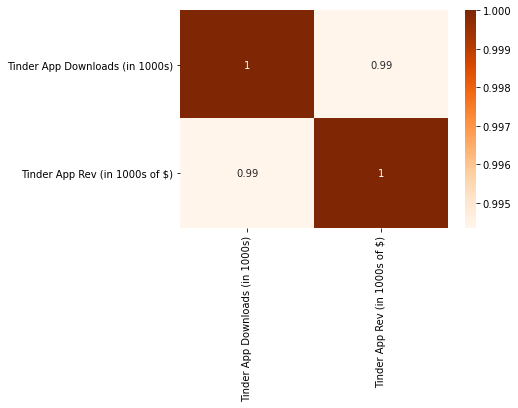

In [27]:
Tinder = pd.DataFrame(Statista, columns = ['Year','Tinder App Downloads (in 1000s)',
                                           'Tinder App Rev (in 1000s of $)']).set_index('Year')

Tinder.corr()
Tinder = sns.heatmap(Tinder.corr(), cmap="Oranges", annot=True)
  
# displaying heatmap
plt.show()

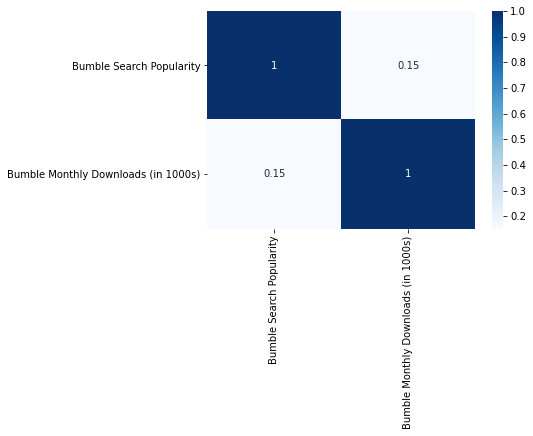

In [28]:
Bumble=PopvDL.tail().drop(columns=['Tinder Search Popularity','Tinder Monthly Downloads (in 1000s)']).set_index('date')

Bumble.corr()
Bumble = sns.heatmap(Bumble.corr(), cmap='Blues', annot=True)
  
# displaying heatmap
plt.show()

#There appears to be no correlation between Bumble search popularity and monthly app downloads.

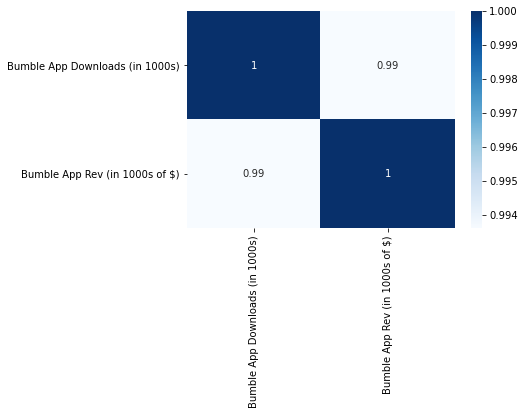

In [29]:
Bumble = pd.DataFrame(Statista, columns = ['Year','Bumble App Downloads (in 1000s)',
                                           'Bumble App Rev (in 1000s of $)']).set_index('Year')


Bumble = sns.heatmap(Bumble.corr(), cmap="Blues", annot=True)
  
# displaying heatmap
plt.show()

After diving deeper into Tinder and Bumble's search popularity, app downloads, and revenue, there appears to be moderate-to-strong correlation between Tinder and Bumble search popularity and app downloads and a high correlation between app downloads and revenue. This tells us that app downloads is more reliable than Google Trends in measuring dating app popularity.

# 6. SEC 10-K Data

In [30]:
#SEC 10-K's in thousands of dollars
SEC=pd.read_csv('10K.csv')
SEC

Year   Tinder  Match Group Other Brands  Bumble
0  2018   805316                    871855  162391
1  2019  1152045                    855129  275545
2  2020  1355400                    989324  337237

In [31]:
#This is in thousands of dollars.
import plotly.graph_objects as go

year=SEC["Year"].array

Tinder_Rev=SEC["Tinder"].array
Match_Group_Other_Brands_Rev=SEC["Match Group Other Brands"].array
Bumble_Rev=SEC["Bumble"].array

fig = go.Figure(data=[
   go.Bar(name='Tinder', x=year, y=Tinder_Rev),
    go.Bar(name='Match Group Other Brands', x=year, y=Match_Group_Other_Brands_Rev),
    go.Bar(name='Bumble', x=year, y=Bumble_Rev)
           ])
           
# Change the bar mode
fig.update_layout(barmode='group',  
                  title={
        'text': "Dating App Revenue (2018-2020)",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'},
                   xaxis_title="Year",
    yaxis_title="Revenue in Thousands of Dollars",
    legend_title="Dating Apps")

texts = [Tinder_Rev,Match_Group_Other_Brands_Rev,Bumble_Rev]
for i, t in enumerate(texts):
    fig.data[i].text = t
    fig.data[i].textposition = 'outside'

fig.show()

Match Group owns Tinder, Hinge, OkCupid, Match.com, and other dating sites (POF, Our Time, etc.). Match Group has categorized all other brands but Tinder in an "Other Brands" category. I cannot disaggregate results for Hinge, OkCupid, and Match.com.

The 10-K data shows that Tinder and Bumble have displayed a double digit YOY revenue growth trajectory for two consecutive years, and that Tinder is by far the highest-revenue dating app.

# 7. So what is the most popular dating app?

Based on Google Trends:

1. Tinder
2. Match.com
3. Bumble
4. Hinge
5. OkCupid

The biggest takeaway from this is that while Match.com and OkCupid have once had a lead in the past, they are trending downwards. If this continues, it is likely that Bumble and Hinge will outpace them in popularity over time. It makes sense as I have not seen as much publicity with Match.com and OkCupid relative to Bumble and Hinge.

Tinder google searches have a 71% correlation with Tinder monthly downloads. Bumble google searches have a -67% correlation with Bumble monthly downloads. Because search popularity scores do fluctuate, that means dating app downloads is a more reliable indicator of dating app popularity.

# 8. Limitations

There were challenges faced when collecting and analyzing the data.

1. The search popularity score on Google Trends is not static. Depending on when I run a given search, even with the same keyword and time range, the score can change for a given month. However, Google Trends is still a good proxy for public interest.
2. In validating the keywords, I'm confident I have chosen the best keywords related to the dating app. When querying directly from Google Trends, the related queries were in line. However, there's always a possibility of noise.
3. Except for Google Trends, we have incomplete information to consistently compare across 5 apps. Statista has more information on Bumble and Tinder and I can't disaggregate Match Group's 10-K for Hinge, OkCupid, and Match.com to understand each app's revenue. It would be interesting to compare monthly app downloads vs. monthly app revenue. Because only annual app revenue was available, monthly downloads was annualized and then the correlation was measured for 2018-2020. This means only 3 data points were used to compare Tinder and Bumble's app downloads vs. app revenue, which is why the strength of this correlation appears high.
4. Revisiting if there is a lag between online dating use today and the number of committed relationships and marriages via online dating, such outcomes are difficult to track because results take too much time.

One idea (and only with prior user consent to opt in) is similar to how instagram uses phone number to make suggestions of who you know, it would be interesting if The Knot and Zola did such syncing with a unique identifier to track how our known contacts met, got married, and/or the duration of their courtship. This would help attribute positive outcomes to specific dating apps to better understand their overall impact to society. The other method is to rely on anecdotal evidence and surveys. I do believe there is a middle ground between user privacy and gaining more transparency of outcomes in the future.

# 9. Bonus: Brand Differentiation

What's interesting about Tinder is its steady popularity over multiple years on Google Trends. Is it because the platform caters to a variety of connections that the others do not? Or is it that their large user base is more enticing?

To that point, each app is branded differently, which will attract different users to their platform.

Dating App Taglines

• Tinder: The #1 place to spark new connections.

• Bumble: Women make the first move.

• Hinge: Designed to be deleted

• Match.com: Start something real

• OkCupid: Dating deserves better

Each app must build their features with their brand in mind.

Tinder is clearly trying to be the #1 place to spark connections. Their features are thoughtful regarding the many possible motives and methods that people want to connect with one another. Their investment in interactivity like Swipe Night, which is a choose your own adventure on Sundays between 6pm-12am can take users away from a prime time slot to use other apps. The Tinder Explore page allows a user to match based on interest. Hot Takes takes place every night from 6pm-12am, which is a form of blind speed dating, where a user can message before deciding to match. If a user doesn't match, then that person can also speed date someone else. The user can not see the other person until a match is made. Not responding in 30 seconds to the other side ends the game. It forces users to spend that time in conversation as opposed to not messaging after matching.

Bumble's Women Make the First Move branding is very solutions elegant. In fact, if you just look at the entire app, the devil is in the details. Bumble gives a lot of power to the user, from choosing whether to apply the Smart Photo algorithm, to choosing the first ice breaker question or giphy to say hi. The video feature feels like a real date! If one is in New York, one can also choose a date location to meet up that's synced to a yelp like page. What I think is great about their features is while women make the first move, Bumble has created multiple features to break the ice or propose a date that even if a user is at lost for words, that person can get the ball rolling with a match.

The perception of Hinge users is that they are looking for a commitment, which is why the Design to be Deleted branding attracts them. Hinge uses the Gale Shapley Algorithm which is the solution to the stable marriage problem. When this algorithm was used to match people on college campuses via a project called the Marriage Pact, some outcomes that occurred were they were matched with their siblings or they ultimately matched with people they became good friends with. Features are oriented toward writing thoughtful answers to prompts and being authentic. Hinge has recently heavily promoted a voice prompt where a user can record their voice so one can hear a person's voice prior to matching. Podcasters have joked that only use this feature if the user has a good voice. It's a sweetener but not necessarily the deciding factor of why someone would match with another.

# Summary

In summary, having more users on a dating app is better because it creates more potential connections. However, there are many reasons why people use dating apps which creates multiple niches companies can exploit. While number of users might attract users to an app, having a positive user experience is what keeps users coming back and factors into popularity. Positive experience can mean connecting with good matches, having fun, seeing progress/momentum, or not getting harassed.

While Tinder is clearly the most popular having grown the largest user base, if an app continues to create positive user experiences, that app can also be a contender in this market.

With this, I'm excited to see how these trends play out over time!

### Python Libraries Used

• Pandas

• Matplotlib

• Seaborn

• Plotly

• NetworkX

• Datetime

### Methods

• Data Visualization